#K-Means y Variantes - Ejercicios




---


Este cuaderno contiene ejercicios prácticos para consolidar los conceptos del Módulo KMeans.

## Configuración Inicial

Ejecute esta celda antes de comenzar los ejercicios.

In [3]:
# Bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Scikit-learn
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Configuración completada.")

Configuración completada.


---

## Ejercicio 1: Comprensión del Algoritmo K-Means

### Contexto

Para comprender en profundidad el funcionamiento de K-Means, es fundamental implementar manualmente los pasos del algoritmo y observar cómo evoluciona la función objetivo.

### Datos

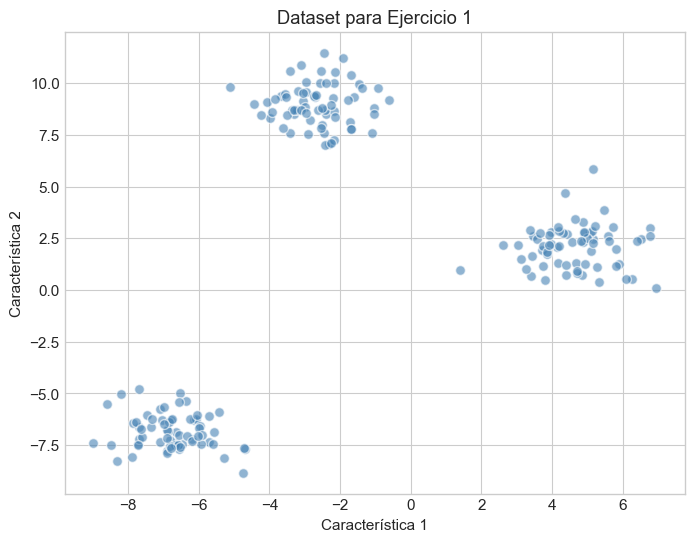

In [4]:
# Generación del dataset para el Ejercicio 1
X_ej1, y_ej1 = make_blobs(
    n_samples=200,
    n_features=2,
    centers=3,
    cluster_std=1.0,
    random_state=RANDOM_STATE
)

# Visualización inicial
plt.figure(figsize=(8, 6))
plt.scatter(X_ej1[:, 0], X_ej1[:, 1], c='steelblue', alpha=0.6, edgecolors='w', s=50)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 1')
plt.show()

### Tarea 1.1: Cálculo de la Inercia (WCSS)

Implemente una función que calcule la inercia (Within-Cluster Sum of Squares) dados los datos, los centroides y las asignaciones de cluster.

$$J = \sum_{k=1}^{K} \sum_{x_i \in C_k} ||x_i - \mu_k||^2$$

In [ ]:
def calcular_inercia(X, centroides, asignaciones):
    """
    Calcula la inercia (WCSS) del clustering.

    Parámetros
    ----------
    X : ndarray de forma (n_samples, n_features)
        Matriz de datos.
    centroides : ndarray de forma (k, n_features)
        Posiciones de los centroides.
    asignaciones : ndarray de forma (n_samples,)
        Índice del cluster asignado a cada punto.

    Retorna
    -------
    float
        Valor de la inercia.
    """
    # TODO: Implementar el cálculo de la inercia
    # Sugerencia: iterar sobre cada cluster, seleccionar los puntos asignados
    # y sumar las distancias al cuadrado al centroide correspondiente

    inercia = 0.0

    # Su código aquí

    return inercia


# Verificación con datos de prueba
centroides_test = np.array([[0, 0], [5, 5], [10, 0]])
asignaciones_test = np.array([0, 0, 1, 1, 2, 2])
X_test = np.array([[0.1, 0.1], [-0.1, -0.1], [5.1, 5.1], [4.9, 4.9], [10.1, 0.1], [9.9, -0.1]])

inercia_calculada = calcular_inercia(X_test, centroides_test, asignaciones_test)
print(f"Inercia calculada: {inercia_calculada:.4f}")
print(f"Inercia esperada (aproximada): 0.12")

### Tarea 1.2: Paso de Asignación

Implemente el paso de asignación de K-Means, donde cada punto se asigna al centroide más cercano.

In [ ]:
def asignar_clusters(X, centroides):
    """
    Asigna cada punto al centroide más cercano.

    Parámetros
    ----------
    X : ndarray de forma (n_samples, n_features)
        Matriz de datos.
    centroides : ndarray de forma (k, n_features)
        Posiciones de los centroides.

    Retorna
    -------
    ndarray de forma (n_samples,)
        Índice del cluster asignado a cada punto.
    """
    # TODO: Implementar el paso de asignación
    # Sugerencia: calcular la distancia de cada punto a cada centroide
    # y asignar al índice del centroide con menor distancia

    n_samples = X.shape[0]
    k = centroides.shape[0]

    # Su código aquí
    asignaciones = np.zeros(n_samples, dtype=int)

    return asignaciones


# Verificación
asignaciones_calc = asignar_clusters(X_test, centroides_test)
print(f"Asignaciones calculadas: {asignaciones_calc}")
print(f"Asignaciones esperadas:  {asignaciones_test}")

### Tarea 1.3: Paso de Actualización

Implemente el paso de actualización, donde cada centroide se recalcula como la media de los puntos asignados.

In [ ]:
def actualizar_centroides(X, asignaciones, k):
    """
    Recalcula los centroides como la media de los puntos asignados.

    Parámetros
    ----------
    X : ndarray de forma (n_samples, n_features)
        Matriz de datos.
    asignaciones : ndarray de forma (n_samples,)
        Índice del cluster asignado a cada punto.
    k : int
        Número de clusters.

    Retorna
    -------
    ndarray de forma (k, n_features)
        Nuevas posiciones de los centroides.
    """
    # TODO: Implementar el paso de actualización
    # Sugerencia: para cada cluster, calcular la media de sus puntos

    n_features = X.shape[1]
    nuevos_centroides = np.zeros((k, n_features))

    # Su código aquí

    return nuevos_centroides


# Verificación
nuevos_centroides = actualizar_centroides(X_test, asignaciones_test, 3)
print("Centroides actualizados:")
print(nuevos_centroides)

### Tarea 1.4: Algoritmo Completo

Utilizando las funciones anteriores, ejecute K-Means manualmente durante 5 iteraciones y registre la evolución de la inercia.

In [ ]:
# TODO: Ejecutar K-Means manualmente
# 1. Inicializar centroides seleccionando 3 puntos aleatorios de X_ej1
# 2. Iterar 5 veces: asignar clusters, actualizar centroides, calcular inercia
# 3. Almacenar la inercia de cada iteración

k = 3
n_iteraciones = 5
historial_inercia = []

# Inicialización
np.random.seed(RANDOM_STATE)
indices_iniciales = np.random.choice(len(X_ej1), size=k, replace=False)
centroides = X_ej1[indices_iniciales].copy()

# Su código aquí: bucle de iteraciones


# Visualización de la evolución de la inercia
if len(historial_inercia) > 0:
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(historial_inercia) + 1), historial_inercia, 'o-', linewidth=2, markersize=8)
    plt.xlabel('Iteración')
    plt.ylabel('Inercia (WCSS)')
    plt.title('Convergencia de K-Means')
    plt.xticks(range(1, len(historial_inercia) + 1))
    plt.show()

### Pregunta de Reflexión 1

Observe la evolución de la inercia a lo largo de las iteraciones:

1. ¿La inercia siempre decrece? ¿Por qué?
2. ¿Qué garantiza la convergencia del algoritmo?
3. ¿El resultado obtenido es el óptimo global? Justifique.

*Escriba su respuesta aquí:*

...

---

## Ejercicio 2: Impacto de la Inicialización

### Contexto

La inicialización de los centroides tiene un impacto significativo en el resultado final de K-Means. En este ejercicio, comparará la inicialización aleatoria con K-Means++.

### Datos

In [1]:
# Dataset para el Ejercicio 2
X_ej2, _ = make_blobs(
    n_samples=300,
    n_features=2,
    centers=5,
    cluster_std=0.9,
    random_state=RANDOM_STATE
)

NameError: name 'make_blobs' is not defined

### Tarea 2.1: Comparación de Inicializaciones

Ejecute K-Means 30 veces con cada tipo de inicialización (aleatoria y K-Means++) y compare las distribuciones de inercia resultantes.

In [ ]:
# TODO: Ejecutar experimento de comparación
n_experimentos = 30
k = 5

inercias_random = []
inercias_kmeanspp = []

# Su código aquí
# Para cada experimento:
#   - Ejecutar KMeans con init='random', n_init=1
#   - Ejecutar KMeans con init='k-means++', n_init=1
#   - Almacenar las inercias resultantes


for i in range(n_experimentos):
    # Su código aquí
    pass

# Visualización
if len(inercias_random) > 0 and len(inercias_kmeanspp) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma
    axes[0].hist(inercias_random, bins=15, alpha=0.7, label='Aleatoria', color='#e74c3c')
    axes[0].hist(inercias_kmeanspp, bins=15, alpha=0.7, label='K-Means++', color='#3498db')
    axes[0].set_xlabel('Inercia')
    axes[0].set_ylabel('Frecuencia')
    axes[0].set_title('Distribución de inercias')
    axes[0].legend()

    # Boxplot
    axes[1].boxplot([inercias_random, inercias_kmeanspp], labels=['Aleatoria', 'K-Means++'])
    axes[1].set_ylabel('Inercia')
    axes[1].set_title('Comparación de inicializaciones')

    plt.tight_layout()
    plt.show()

    # Estadísticas
    print(f"\nEstadísticas de inercia:")
    print(f"{'Método':<15} {'Media':<12} {'Std':<12} {'Mín':<12} {'Máx':<12}")
    print("-" * 63)
    print(f"{'Aleatoria':<15} {np.mean(inercias_random):<12.2f} {np.std(inercias_random):<12.2f} {np.min(inercias_random):<12.2f} {np.max(inercias_random):<12.2f}")
    print(f"{'K-Means++':<15} {np.mean(inercias_kmeanspp):<12.2f} {np.std(inercias_kmeanspp):<12.2f} {np.min(inercias_kmeanspp):<12.2f} {np.max(inercias_kmeanspp):<12.2f}")

### Pregunta de Reflexión 2

Analice los resultados del experimento:

1. ¿Qué diferencias observa entre ambas inicializaciones en términos de media y varianza?
2. ¿Por qué K-Means++ tiende a producir mejores resultados?
3. ¿Cuál es el propósito del parámetro `n_init` en scikit-learn?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 3: Selección del Número de Clusters

### Contexto

Uno de los principales desafíos de K-Means es determinar el número óptimo de clusters. En este ejercicio, aplicará tres métodos de selección a un dataset con estructura desconocida.

### Datos

In [ ]:
# Dataset para el Ejercicio 3 (estructura oculta)
np.random.seed(123)
X_ej3, y_ej3_oculto = make_blobs(
    n_samples=400,
    n_features=2,
    centers=6,
    cluster_std=[0.8, 1.0, 0.6, 1.2, 0.9, 0.7],
    random_state=123
)

# Visualización (sin etiquetas)
plt.figure(figsize=(8, 6))
plt.scatter(X_ej3[:, 0], X_ej3[:, 1], c='steelblue', alpha=0.6, edgecolors='w', s=50)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 3 (estructura desconocida)')
plt.show()

### Tarea 3.1: Método del Codo

Calcule la inercia para k = 2, 3, ..., 10 y genere el gráfico del codo.

In [ ]:
# TODO: Implementar el método del codo
k_range = range(2, 11)
inercias = []

# Su código aquí


# Visualización
if len(inercias) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inercias, 'o-', linewidth=2, markersize=10, color='steelblue')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inercia (WCSS)')
    plt.title('Método del Codo')
    plt.xticks(k_range)
    plt.show()

### Tarea 3.2: Método de la Silueta

Calcule el coeficiente de silueta promedio para k = 2, 3, ..., 10.

In [ ]:
# TODO: Implementar el método de la silueta
siluetas = []

# Su código aquí


# Visualización
if len(siluetas) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, siluetas, 'o-', linewidth=2, markersize=10, color='#2ecc71')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Método de la Silueta')
    plt.xticks(k_range)

    # Marcar el máximo
    k_optimo = list(k_range)[np.argmax(siluetas)]
    plt.axvline(x=k_optimo, color='red', linestyle='--', label=f'k óptimo = {k_optimo}')
    plt.legend()
    plt.show()

### Tarea 3.3: Diagrama de Siluetas Detallado

Genere diagramas de silueta para k = 4, 5, 6, 7 para analizar la calidad de cada cluster individualmente.

In [ ]:
# TODO: Generar diagramas de silueta
# Sugerencia: para cada k, calcular silhouette_samples y visualizar

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, k in enumerate([4, 5, 6, 7]):
    ax = axes[idx]

    # TODO: Ajustar KMeans con k clusters
    # TODO: Calcular siluetas individuales con silhouette_samples
    # TODO: Visualizar el diagrama de siluetas

    # Su código aquí
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Coeficiente de Silueta')
    ax.set_ylabel('Cluster')

plt.tight_layout()
plt.show()

### Pregunta de Reflexión 3

Basándose en los análisis realizados:

1. ¿Qué valor de k sugiere el método del codo? ¿Es claro el punto de inflexión?
2. ¿Qué valor de k maximiza el coeficiente de silueta?
3. ¿Los diagramas de silueta muestran clusters homogéneos para el k seleccionado?
4. ¿Cuál sería su recomendación final para k y por qué?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 4: Mini-Batch K-Means y Escalabilidad

### Contexto

Para datasets grandes, Mini-Batch K-Means ofrece una alternativa eficiente. En este ejercicio, comparará el rendimiento y la calidad de ambos algoritmos.

### Datos

In [ ]:
# Datasets de diferentes tamaños
tamanos = [1000, 5000, 20000, 50000]
datasets = {}

for n in tamanos:
    X_temp, _ = make_blobs(n_samples=n, n_features=2, centers=8,
                           cluster_std=1.0, random_state=RANDOM_STATE)
    datasets[n] = X_temp

print(f"Datasets generados: {list(datasets.keys())} muestras")

### Tarea 4.1: Comparación de Tiempo de Ejecución

Para cada tamaño de dataset, mida el tiempo de ejecución de K-Means estándar y Mini-Batch K-Means.

In [ ]:
import time

# TODO: Comparar tiempos de ejecución
resultados = {
    'n_samples': [],
    'tiempo_kmeans': [],
    'tiempo_minibatch': [],
    'inercia_kmeans': [],
    'inercia_minibatch': []
}

k = 8

for n, X in datasets.items():
    # TODO: Medir tiempo y inercia para KMeans
    # TODO: Medir tiempo y inercia para MiniBatchKMeans (batch_size=256)
    # Su código aquí
    pass

# Crear DataFrame con resultados
if len(resultados['n_samples']) > 0:
    df_resultados = pd.DataFrame(resultados)
    df_resultados['speedup'] = df_resultados['tiempo_kmeans'] / df_resultados['tiempo_minibatch']
    df_resultados['diferencia_inercia_%'] = 100 * (df_resultados['inercia_minibatch'] - df_resultados['inercia_kmeans']) / df_resultados['inercia_kmeans']

    print(df_resultados.to_string(index=False))

### Tarea 4.2: Visualización de Resultados

In [ ]:
# TODO: Visualizar la comparación
# Gráfico 1: Tiempo de ejecución vs tamaño del dataset
# Gráfico 2: Speedup vs tamaño del dataset

if 'df_resultados' in dir() and len(df_resultados) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Su código aquí para crear los gráficos

    plt.tight_layout()
    plt.show()

### Pregunta de Reflexión 4

Analice los resultados de la comparación:

1. ¿Cómo escala el speedup con el tamaño del dataset?
2. ¿Cuál es el impacto en la calidad del clustering (diferencia de inercia)?
3. ¿En qué situaciones recomendaría usar Mini-Batch K-Means?
4. ¿Cómo afecta el parámetro `batch_size` al trade-off velocidad/calidad?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 5: Limitaciones de K-Means

### Contexto

K-Means tiene limitaciones importantes que es fundamental conocer. En este ejercicio, explorará escenarios donde el algoritmo no funciona correctamente.

### Datos

In [ ]:
# Dataset 1: Clusters de forma no esférica (lunas)
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=RANDOM_STATE)

# Dataset 2: Clusters de diferente densidad y tamaño
np.random.seed(RANDOM_STATE)
cluster1 = np.random.randn(300, 2) * 0.3 + np.array([0, 0])
cluster2 = np.random.randn(50, 2) * 0.8 + np.array([4, 4])
cluster3 = np.random.randn(50, 2) * 0.8 + np.array([4, 0])
X_desbalanceado = np.vstack([cluster1, cluster2, cluster3])
y_desbalanceado = np.array([0]*300 + [1]*50 + [2]*50)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', edgecolors='w', s=50)
axes[0].set_title('Dataset 1: Clusters no esféricos')
axes[0].set_xlabel('Característica 1')
axes[0].set_ylabel('Característica 2')

axes[1].scatter(X_desbalanceado[:, 0], X_desbalanceado[:, 1], c=y_desbalanceado, cmap='viridis', edgecolors='w', s=50)
axes[1].set_title('Dataset 2: Clusters desbalanceados')
axes[1].set_xlabel('Característica 1')
axes[1].set_ylabel('Característica 2')

plt.tight_layout()
plt.show()

### Tarea 5.1: Aplicar K-Means a Datos No Esféricos

Aplique K-Means con k=2 al dataset de lunas y evalúe el resultado.

In [ ]:
# TODO: Aplicar K-Means al dataset de lunas
# 1. Ajustar KMeans con k=2
# 2. Calcular Adjusted Rand Index (ARI) comparando con y_moons
# 3. Visualizar el resultado

# Su código aquí


# Visualización
# Su código aquí para visualizar el resultado de K-Means vs ground truth

### Tarea 5.2: Aplicar K-Means a Datos Desbalanceados

Aplique K-Means con k=3 al dataset desbalanceado y analice cómo maneja los clusters de diferente tamaño.

In [ ]:
# TODO: Aplicar K-Means al dataset desbalanceado
# 1. Ajustar KMeans con k=3
# 2. Calcular ARI y NMI
# 3. Contar puntos por cluster predicho vs real

# Su código aquí


# Visualización y análisis
# Su código aquí

### Pregunta de Reflexión 5

Analice las limitaciones observadas:

1. ¿Por qué K-Means falla con los clusters en forma de luna?
2. ¿Qué sucede con el cluster grande en el dataset desbalanceado?
3. Para cada caso, ¿qué algoritmo alternativo recomendaría y por qué?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 6: Caso Práctico Integrador

### Contexto

Una empresa de retail desea segmentar a sus clientes para personalizar sus estrategias de marketing. Dispone de datos de transacciones que incluyen información sobre el comportamiento de compra de cada cliente.

### Datos

In [ ]:
# Simulación de datos de clientes
np.random.seed(RANDOM_STATE)
n_clientes = 800

# Generar características de clientes
data = {
    'CustomerID': range(1, n_clientes + 1),
    'Recency': np.concatenate([
        np.random.exponential(15, 200),      # Clientes muy activos
        np.random.exponential(45, 250),      # Clientes regulares
        np.random.exponential(90, 200),      # Clientes ocasionales
        np.random.exponential(180, 150)      # Clientes inactivos
    ]),
    'Frequency': np.concatenate([
        np.random.poisson(20, 200) + 5,
        np.random.poisson(8, 250) + 2,
        np.random.poisson(3, 200) + 1,
        np.random.poisson(1, 150) + 1
    ]),
    'Monetary': np.concatenate([
        np.random.lognormal(6, 0.5, 200),
        np.random.lognormal(5, 0.4, 250),
        np.random.lognormal(4.5, 0.6, 200),
        np.random.lognormal(4, 0.5, 150)
    ]),
    'AvgBasketSize': np.concatenate([
        np.random.normal(8, 2, 200),
        np.random.normal(5, 1.5, 250),
        np.random.normal(3, 1, 200),
        np.random.normal(2, 0.8, 150)
    ])
}

df_clientes = pd.DataFrame(data)
df_clientes['Recency'] = df_clientes['Recency'].clip(lower=1)
df_clientes['AvgBasketSize'] = df_clientes['AvgBasketSize'].clip(lower=1)

print("Primeras filas del dataset:")
print(df_clientes.head(10))
print(f"\nDimensiones: {df_clientes.shape}")
print(f"\nEstadísticas descriptivas:")
print(df_clientes.describe())

### Tarea 6.1: Análisis Exploratorio

Realice un análisis exploratorio de las variables disponibles.

In [ ]:
# TODO: Análisis exploratorio
# 1. Visualizar distribuciones de cada variable
# 2. Analizar correlaciones
# 3. Identificar posibles outliers
features = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize']

# 1. Distribuciones de cada variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(features):
    ax = axes[idx]
    ax.hist(df_clientes[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    ax.axvline(df_clientes[col].mean(), color='red', linestyle='--', label=f'Media: {df_clientes[col].mean():.2f}')
    ax.axvline(df_clientes[col].median(), color='green', linestyle='--', label=f'Mediana: {df_clientes[col].median():.2f}')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.legend()

plt.tight_layout()
plt.show()

# 2. Matriz de correlaciones
print("\n" + "="*50)
print("MATRIZ DE CORRELACIONES")
print("="*50)

correlation_matrix = df_clientes[features].corr()
print(correlation_matrix.round(3))

# Visualización de correlaciones con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', square=True, linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()

# 3. Identificación de outliers con boxplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for idx, col in enumerate(features):
    ax = axes[idx]
    bp = ax.boxplot(df_clientes[col], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax.set_title(f'Boxplot de {col}')
    ax.set_ylabel(col)

    # Calcular y mostrar número de outliers
    Q1 = df_clientes[col].quantile(0.25)
    Q3 = df_clientes[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_clientes[(df_clientes[col] < Q1 - 1.5*IQR) | (df_clientes[col] > Q3 + 1.5*IQR)][col]
    ax.text(0.5, 0.02, f'Outliers: {len(outliers)}', transform=ax.transAxes, ha='center')

plt.tight_layout()
plt.show()

# 4. Scatter plot matrix (pairplot)
print("\n" + "="*50)
print("RELACIONES ENTRE VARIABLES")
print("="*50)

sns.pairplot(df_clientes[features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot de Variables RFM', y=1.02)
plt.tight_layout()
plt.show()

print("\nObservaciones del análisis exploratorio:")
print("- Recency: Distribución sesgada a la derecha (muchos clientes recientes, pocos inactivos)")
print("- Frequency: Distribución sesgada a la derecha (la mayoría compra pocas veces)")
print("- Monetary: Distribución log-normal típica de gastos")
print("- AvgBasketSize: Distribución más simétrica")
print("- Correlaciones positivas entre Frequency, Monetary y AvgBasketSize")
print("- Correlación negativa entre Recency y las demás variables")

### Tarea 6.2: Preprocesamiento

Prepare los datos para el clustering: seleccione las características relevantes y aplique estandarización.

In [ ]:
# TODO: Preprocesamiento
# 1. Seleccionar características (excluir CustomerID)
# 2. Aplicar StandardScaler

features = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize']

# Su código aquí

### Tarea 6.3: Determinación del Número de Segmentos

Utilice los métodos del codo y silueta para determinar el número óptimo de segmentos.

In [ ]:
# TODO: Determinar número óptimo de clusters
# 1. Aplicar método del codo
# 2. Aplicar método de la silueta
# 3. Decidir el número de segmentos

# Su código aquí

### Tarea 6.4: Segmentación y Perfilado

Aplique K-Means con el número de clusters seleccionado y genere perfiles descriptivos de cada segmento.

In [ ]:
# TODO: Segmentación final
# 1. Ajustar KMeans con k óptimo
# 2. Asignar segmentos a los clientes
# 3. Calcular estadísticas por segmento

# Su código aquí

### Tarea 6.5: Visualización de Segmentos

In [ ]:
# TODO: Visualizar los segmentos
# 1. Scatter plots de pares de variables coloreados por segmento
# 2. Gráfico de barras con valores medios por segmento
# 3. Distribución de clientes por segmento

# Su código aquí

### Tarea 6.6: Interpretación y Recomendaciones

Basándose en el perfilado de segmentos, asigne nombres descriptivos y proponga estrategias de marketing.

In [ ]:
# TODO: Interpretación de segmentos
# Crear una tabla con:
# - Nombre del segmento
# - Características principales
# - Estrategia de marketing recomendada

# Su código aquí

### Pregunta de Reflexión Final

Reflexione sobre el proceso completo de segmentación:

1. ¿Qué desafíos encontró durante el análisis?
2. ¿Cómo validaría la utilidad de estos segmentos en un contexto real de negocio?
3. ¿Qué información adicional sería útil para mejorar la segmentación?
4. ¿Consideraría algún algoritmo alternativo? ¿Por qué?

*Escriba su respuesta aquí:*

...

---

## Referencias

- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning*. Springer.
- Arthur, D., & Vassilvitskii, S. (2007). k-means++: The advantages of careful seeding. *SODA '07*.
- Scikit-learn documentation: https://scikit-learn.org/stable/modules/clustering.html

---

*Cuaderno de ejercicios desarrollado para el Máster en Ciencia de Datos*

#EOF (End Of File)